# Esame di Metodi Numerici - 6 Luglio 2023
## Turno II -- Ore 11.45

## Esercizio 1


Nel file ``Test_II.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. Risolvere i 3 sistemi lineari aventi ciascuno di essi come matrice dei coefficienti A1 e termine noto b1, A2 e termine noto b2, A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.
Verificare se le matrici sono malcondizionate, dire teoricamente cosa questo implica e verificarlo sperimentalmente.


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_II.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

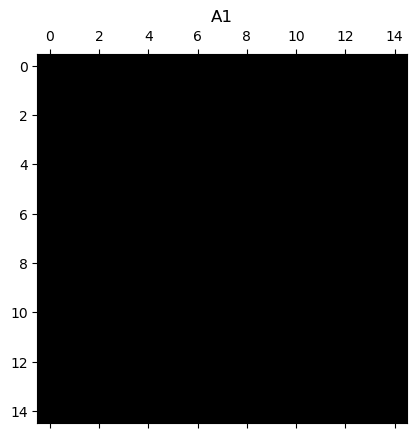

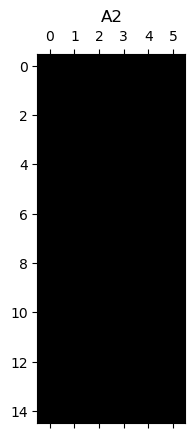

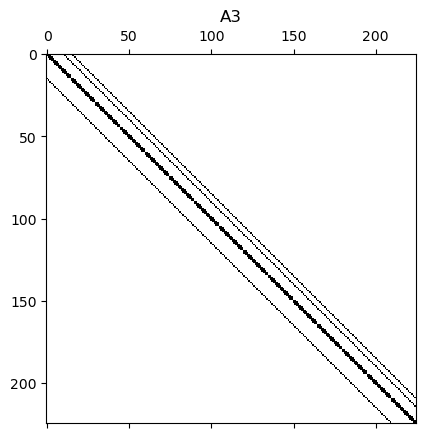

Cond A1:  16801108.671136115
Cond A2:  9.999999999999998
Cond A3:  1.185268011766112
sol1:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
sol1 perturbata (delta=2.500000e-04): [[ 15.66346064]
 [ -9.31054107]
 [ -5.82806517]
 [ -2.2649794 ]
 [  3.72629659]
 [-14.77521973]
 [-29.41402854]
 [ 34.12971769]
 [ 22.59770657]
 [  7.32171426]
 [  1.62555002]
 [-16.15071063]
 [ -6.06634696]
 [  1.35439667]
 [  7.09746371]]
Errore:  59.54569324665244
raggio spettrale Gauss-Seidel  0.024750078276736125
x3:  [[-0.96364815]
 [-0.96298785]
 [-0.96297652]
 [-0.96295214]
 [-0.96362307]
 [-0.96298764]
 [-0.96296365]
 [-0.96296301]
 [-0.9629623 ]
 [-0.96297515]
 [-0.96296365]
 [-0.96296278]
 [-0.96297473]
 [-0.96231511]
 [-0.99862988]
 [-0.96297542]
 [-0.96229045]
 [-0.96227849]
 [-0.96225273]
 [-0.96294867]
 [-0.96230244]
 [-0.9622778 ]
 [-0.96227714]
 [-0.9622764 ]
 [-0.9622895 ]
 [-0.9622778 ]
 [-0.96227689]
 [-0.96228952]
 [-0.96160528]
 [-0.99859114]
 [-0

In [1]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy as sp
import scipy.linalg as spl
import RisolviSis

dati = loadmat('Test_II.mat')
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)
A2=dati["A2"]
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)
A3=dati["A3"]
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)

plt.spy(A1)
plt.title("A1")
plt.show()
plt.spy(A2)
plt.title("A2")
plt.show()
plt.spy(A3)
plt.title("A3")
plt.show()

print("Cond A1: ",npl.cond(A1))
print("Cond A2: ",npl.cond(A2))
print("Cond A3: ",npl.cond(A3))



#"""A1 densa, piccola, mal condizionata""" => Fatt. QR
#"""A2 sist. sovradeterminato, densa, piccola, ben condizionata""" => eq. normali
#"""A3 sparsa, grande, ben condizionata """ => gauss_seidel

Q,R = spl.qr(A1)
y = np.dot(Q.T,b1)
x1 = npl.solve(R,y)

print("sol1: ", x1)

A1_p = A1.copy()
delta = 0.00025
A1_p = A1_p + delta

Q,R = spl.qr(A1_p)
y = np.dot(Q.T,b1)
x1_p = npl.solve(R,y)

print("sol1 perturbata (delta={:e}): {}".format(delta, x1_p))

errore = npl.norm(x1-x1_p)
print("Errore: ",errore)
#Si vede che A e' mal condizionata in quanto una piccolissima perturbazione causa un errore enorme.

def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d = np.diag(A)
    D= np.diag(d)
    E= np.tril(A,-1)
    F= np.triu(A,1)
    M= -(D+E)
    N= -F
    T=np.dot(npl.inv(M),N)
     
    raggiospettrale= np.max(np.abs(npl.eigvals(T)))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while errore > toll and it < it_max:
        tmp = b + np.dot(N,x0)
        x,flag= RisolviSis.Lsolve(M,tmp)
        errore= npl.norm(x-x0)/npl.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

x0 = np.zeros((A3.shape[0],1))
toll = 10e-8
it_max = 1000

x3,it3,err3 = gauss_seidel(A3,b3,x0,toll,it_max)

print("x3: ", x3)
print("Iterazioni gauss-seidel: ", it3)
print("Errore gauss-seidel: ", err3)

def eqnorm(A,b):
#Soluzione di un sistema sovradeterminato facendo uso delle equazioni normali
    G=A.T@A 
    f= A.T@b
    L= spl.cholesky(G,lower=True) 
    y,flag = RisolviSis.Lsolve(L,f)
    if flag == 0:
        x,flag = RisolviSis.Usolve(L.T,y)
    return x 
x2 = eqnorm(A2,b2)

print("Sol. 2: ", x2)


# Esercizio 2

Data l'equazione di 2° grado $$\frac{1}{2} x^2+2bx-c=0$$

con $b=10^7, c=10^{-i},i=-5,\cdots,12 $

- a) Scrivere le due formule algebriche per ricavare i valori delle 2 soluzioni

                                                                                    1 punto
- b) Studiare l'indice di condizionamento delle 2 formule algebriche, facendo uso del risultato teorico visto a lezione riguardo l'indice di condizionamento della valutazione di una funzione. (Spiegare il significato di problema mal condizionato) e dire quale delle due formule è malcondizionata. Per quali valori di $c$ il problema risulta ben condizionato?

                                                                                    5 punti

- c) Nel caso in cui una delle due formule risulti mal condizionata, proporre una soluzione algebricamente equivalente che non sia malcondizionata.

                                                                                    3 punti

                                                                        Totale 9 punti

In [2]:
import sympy as sym
from sympy.utilities import lambdify
x,b,c = sym.symbols('x b c')

# D = b**2 - 4ac = b**2 - 2c => x1 = -b + sign(b)*sqrt(b**2-2c)/2a = -b + sign(b)*sqrt(b**2-2c)

x1 = -b + sym.sign(b)*sym.sqrt(b**2-2*c)
pr = 2*c
x2 = x1/pr

dx1 = sym.diff(x1,c,1)
dx2 = sym.diff(x2,c,1)

x1_b = x1.subs(b,10**7)
dx1_b = dx1.subs(b,10**7)
x2_b = x2.subs(b,10**7)
dx2_b = dx2.subs(b,10**7)

i = np.arange(-5,13,1)
c_vet = 10.0**(-i)
b_num = 10**7

x1_num = lambdify(c,x1_b,np)
dx1_num = lambdify(c,dx1_b,np)
x2_num = lambdify(c,x2_b,np)
dx2_num = lambdify(c,dx2_b,np)

sol1 = x1_num(c_vet)
sol2 = x2_num(c_vet)

print(sol1)
print(sol2)

cond1 = np.abs(x1_num(c_vet)*c_vet)/np.abs(dx1_num(c_vet))
print("Condizionamento 1: ", cond1)
cond23 = np.abs(x2_num(c_vet)*c_vet)/np.abs(dx2_num(c_vet))
print("Condizionamento 2: ", cond1)


[-9.99999978e-03 -1.00000016e-03 -9.99998301e-05 -1.00005418e-05
 -1.00024045e-06 -1.00582838e-07 -9.31322575e-09  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-4.99999989e-08 -5.00000082e-08 -4.99999151e-08 -5.00027090e-08
 -5.00120223e-08 -5.02914190e-08 -4.65661287e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Condizionamento 1:  [9.99999977e+09 1.00000016e+08 9.99998301e+05 1.00005418e+04
 1.00024045e+02 1.00582838e+00 9.31322575e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Condizionamento 2:  [9.99999977e+09 1.00000016e+08 9.99998301e+05 1.00005418e+04
 1.00024045e+02 1.00582838e+00 9.31

## Domanda intelligenza artificiale

 Limiti delle reti MLP (multilayer Perceptron) ed introduzione delle Reti neurali Convoluzionali. 
- Architettura di una rete neurale convoluzionale: strati convoluzionali, attivazione non lineare e pooling + parte fully connected.
- Loss function per il task della regressione.  Training di una rete. 
- Cenni sull'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi ditutti i layer .
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch.
                                                                                [7  punti]
